# 逻辑回归

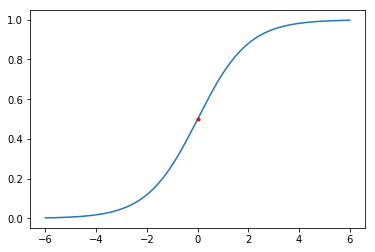

In [7]:
'''
sigmoid函数图像
'''
import numpy as np
import matplotlib.pyplot as plt

x1=np.arange(-6,6,0.01)
g_x=[]
for x in x1:
    g_x.append((1.0/(1+np.exp(-x))))
    
plt.plot(x1,g_x)
plt.plot(0,1.0/(1+np.exp(-0)),'r.')

plt.show()


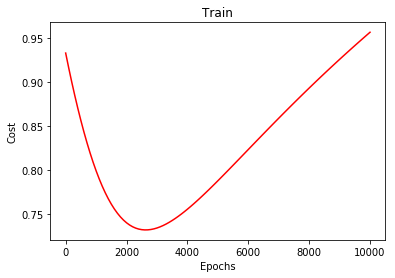

             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89         9
        1.0       0.90      0.90      0.90        10

avg / total       0.89      0.89      0.89        19



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report #评估
from sklearn import preprocessing

#数据是否需要标准化
scale = True

#载入数据
data = np.genfromtxt("逻辑回归.csv",delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=["label0","label1"],loc="best")
    
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

#代价函数
def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(1-sigmoid(xMat*ws)))
    right = np.multiply(1-yMat,np.log(1-sigmoid(xMat*ws)))
    return np.sum(left+right)/-(len(xMat))

def gradAscent(xArr,yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    #计算数据行列数
    #m,行,代表数据个数   n,列,代表权值个数
    m,n = np.shape(xMat)
    #初始化权值
    ws = np.mat(np.ones((n,1))) 
    
    for i in range(epochs+1):
        #样本的预测值 = xMat 和 weights 矩阵相乘
        h=sigmoid(xMat*ws)
        #计算误差
        ws_grad = xMat.T*(h-yMat)/m
        ws = ws - lr*ws_grad
        
        if i%100 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

#数据处理，添加偏置项
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]
X_data = np.concatenate((np.ones((len(x_data),1)),x_data),axis=1)

#训练模型，得到权值和cost值的变化
ws,cost_list = gradAscent(X_data,y_data)

# print(ws)

if scale == False:
    #画图决策边界
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0]-x_test*ws[1])/ws[2]
    plt.plot(x_test,y_test,'k')#两点确定一条直线
    plt.show()
##画出loss值的变化
x = np.linspace(0,10000,101)
plt.plot(x,cost_list,c='r')
plt.title("Train")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
    
#预测
def predict(x_data,ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x>=0.5 else 0 for x in sigmoid(xMat*ws)]

prediction = predict(X_data,ws)
print(classification_report(y_data,prediction))


# sklearn 实现逻辑回归

[1.67838297] [[ 0.00416758 -0.27179007]]


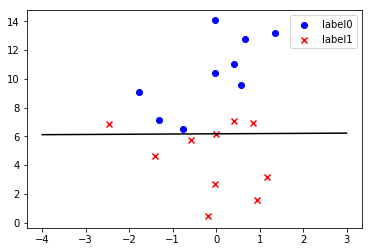

             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86         9
        1.0       1.00      0.70      0.82        10

avg / total       0.88      0.84      0.84        19



In [1]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt

#载入数据
data = np.genfromtxt("逻辑回归.csv",delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

scale = False#数据是否需要标准化

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=["label0","label1"],loc="best")

#定义逻辑回归模型
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

print(logistic.intercept_,logistic.coef_)

if scale == False:
    #画图 决策边界
    plot()
    x_test = np.array([[-4],[3]])
    y_test = (-logistic.intercept_ - x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
    plt.plot(x_test,y_test,'k')
    plt.show()
    
#效果指标
predictions = logistic.predict(x_data)
print(classification_report(y_data,predictions))


# 梯度下降法-非线性逻辑回归

C:\Users\HL\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
C:\Users\HL\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply


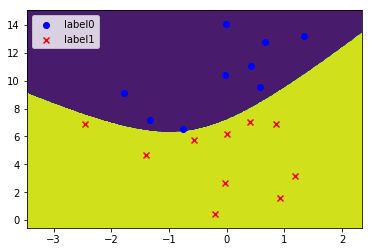

In [1]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

#载入数据
data = np.genfromtxt("逻辑回归.csv",delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

scale = False#数据是否需要标准化

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=["label0","label1"],loc="best")

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

#代价函数
def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat*ws)))
    right = np.multiply(1-yMat,np.log(1-sigmoid(xMat*ws)))
    return np.sum(left+right)/-(len(xMat))

def gradAscent(xArr,yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    #计算数据行列数
    #m,行,代表数据个数   n,列,代表权值个数
    m,n = np.shape(xMat)
    #初始化权值
    ws = np.mat(np.ones((n,1))) 
    
    for i in range(epochs+1):
        #样本的预测值 = xMat 和 weights 矩阵相乘
        h=sigmoid(xMat*ws)
        #计算误差
        ws_grad = xMat.T*(h-yMat)/m
        ws = ws - lr*ws_grad
        
        if i%100 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList


# 定义多项式回归，degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=2)

#特征处理
x_poly = poly_reg.fit_transform(x_data)

#训练模型，得到权值和cost值的变化
ws,cost_list = gradAscent(x_poly,y_data)

#获取数据值所在的范围
x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))
#ravel 与 flatten 类似，多维数据转一维 flatten 不会改变原始值
z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(),yy.ravel()]).dot(np.array(ws)))
            
for i in range(len(z)):
    if z[i] > 0.5:
        z[i]=1
    else:
        z[i]=0
            
z=z.reshape(xx.shape)

#画等高线图
cs = plt.contourf(xx,yy,z)
plot() #画数据点

plt.plot()
plt.show()
